In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('train_mnist.csv')

In [69]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
df.shape

(42000, 785)

In [16]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [20]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
5424      3       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
5424       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
5424         0         0         0         0  

[1 rows x 785 columns]

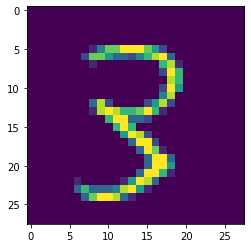

In [10]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[5424,1:].values.reshape(28,28))
plt.show()

In [11]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
23298      2       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
23298       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
23298         0         0         0         0         0  

[1 rows x 785 columns]

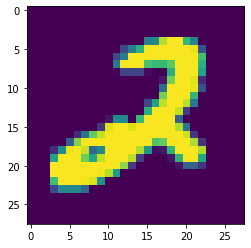

In [12]:
plt.imshow(df.iloc[23298,1:].values.reshape(28,28))
plt.show()

In [13]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=10)

In [71]:
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [73]:
import time 
start = time.time()
y_pred= knn.predict(X_test)
print(time.time() - start)

42.71636080741882


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9677380952380953

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train.shape ,X_test.shape

((33600, 784), (8400, 784))

In [78]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=100)

In [79]:
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [80]:
X_train_transformed.shape, X_test_transformed.shape

((33600, 100), (8400, 100))

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [82]:
y_pred = knn.predict(X_test_transformed)

In [83]:
accuracy_score(y_test , y_pred)

0.9533333333333334

In [46]:
for i in range(100,101):
    pca = PCA(n_components=i)
    X_train_transformed = pca.fit_transform(X_train)
    X_test_transformed = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_transformed, y_train)
    
    y_pred = knn.predict(X_test_transformed)
    
    print(accuracy_score(y_test , y_pred))

0.9529761904761904


In [84]:
##2D visualization

pca =PCA(n_components =2)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [85]:
X_train_transformed.shape

(33600, 2)

In [86]:
import plotly.express as px
y_train_transformed = y_train.astype(str)
fig = px.scatter(x = X_train_transformed[:,0],y = X_train_transformed[:,1],color = y_train_transformed,color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [87]:
##3D visualization

pca =PCA(n_components =3)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [88]:
X_train_transformed.shape

(33600, 3)

In [89]:
y_train_transformed = y_train.astype(str)
fig = px.scatter_3d(x = X_train_transformed[:,0],y = X_train_transformed[:,1],z= X_train_transformed[:,2],
                 color = y_train_transformed,color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [90]:
pca.explained_variance_
#Eigen values

array([40.76315261, 29.18073844, 26.70841405])

In [91]:
pca.components_.shape
#Eigen vectors

(3, 784)

In [92]:
pca.explained_variance_ratio_
# Percentage ofvariance explained by each Principal component

array([0.05790048, 0.04144868, 0.03793696])

# How to choose the optimal value of components

In [93]:
pca =PCA(n_components =None)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [95]:
X_train_transformed.shape

(33600, 784)

In [96]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05790048, 0.09934916, 0.13728612, 0.16676976, 0.19260665,
       0.21503594, 0.23473151, 0.25252102, 0.26818766, 0.28250678,
       0.29621629, 0.30857454, 0.3200456 , 0.33124262, 0.34175688,
       0.35187456, 0.36144668, 0.3709275 , 0.38003785, 0.3889315 ,
       0.39739504, 0.40557905, 0.41339913, 0.42094263, 0.42829241,
       0.43530194, 0.44222092, 0.44889878, 0.455227  , 0.46141393,
       0.46757185, 0.47361799, 0.47943387, 0.48518335, 0.49087491,
       0.49635012, 0.50176134, 0.50700255, 0.51212947, 0.51702887,
       0.52190134, 0.52671257, 0.53138332, 0.5359967 , 0.54058192,
       0.54510372, 0.5495639 , 0.55398998, 0.55836775, 0.56265289,
       0.56691943, 0.57110119, 0.57516833, 0.57921799, 0.58322376,
       0.58717701, 0.59106149, 0.59479876, 0.59852737, 0.60219699,
       0.60580965, 0.60936403, 0.61284449, 0.61630673, 0.61974087,
       0.62314016, 0.62649143, 0.62978699, 0.63303645, 0.63626407,
       0.63944319, 0.64261968, 0.64573594, 0.64881943, 0.65187

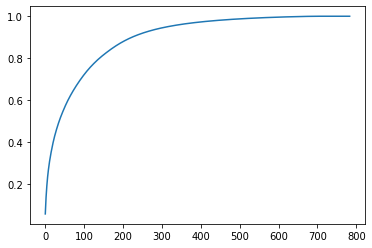

In [103]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
